# kNN算法
## 1 手写数字的识别

In [1]:
# classify using kNN  
def kNNClassify(newInput, dataSet, labels, k):  
    numSamples = dataSet.shape[0] # shape[0] stands for the num of row  
  
    ## step 1: calculate Euclidean distance  
    # tile(A, reps): Construct an array by repeating A reps times  
    # the following copy numSamples rows for dataSet  
    diff = tile(newInput, (numSamples, 1)) - dataSet # Subtract element-wise  
    squaredDiff = diff ** 2 # squared for the subtract  
    squaredDist = sum(squaredDiff, axis = 1) # sum is performed by row  
    distance = squaredDist ** 0.5  
  
    ## step 2: sort the distance  
    # argsort() returns the indices that would sort an array in a ascending order  
    sortedDistIndices = argsort(distance)  
  
    classCount = {} # define a dictionary (can be append element)  
    for i in xrange(k):  
        ## step 3: choose the min k distance  
        voteLabel = labels[sortedDistIndices[i]]  
  
        ## step 4: count the times labels occur  
        # when the key voteLabel is not in dictionary classCount, get()  
        # will return 0  
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1  
  
    ## step 5: the max voted class will return  
    maxCount = 0  
    for key, value in classCount.items():  
        if value > maxCount:  
            maxCount = value  
            maxIndex = key  
  
    return maxIndex   
  
# convert image to vector  
def  img2vector(filename):  
    rows = 32  
    cols = 32  
    imgVector = zeros((1, rows * cols))   
    fileIn = open(filename)  
    for row in xrange(rows):  
        lineStr = fileIn.readline()  
        for col in xrange(cols):  
            imgVector[0, row * 32 + col] = int(lineStr[col])  
  
    return imgVector  
  
# load dataSet  
def loadDataSet():  
    ## step 1: Getting training set  
    print "---Getting training set..."  
    dataSetDir = 'E:/Python/Machine Learning in Action/'  
    trainingFileList = os.listdir(dataSetDir + 'trainingDigits') # load the training set  
    numSamples = len(trainingFileList)  
  
    train_x = zeros((numSamples, 1024))  
    train_y = []  
    for i in xrange(numSamples):  
        filename = trainingFileList[i]  
  
        # get train_x  
        train_x[i, :] = img2vector(dataSetDir + 'trainingDigits/%s' % filename)   
  
        # get label from file name such as "1_18.txt"  
        label = int(filename.split('_')[0]) # return 1  
        train_y.append(label)  
  
    ## step 2: Getting testing set  
    print "---Getting testing set..."  
    testingFileList = os.listdir(dataSetDir + 'testDigits') # load the testing set  
    numSamples = len(testingFileList)  
    test_x = zeros((numSamples, 1024))  
    test_y = []  
    for i in xrange(numSamples):  
        filename = testingFileList[i]  
  
        # get train_x  
        test_x[i, :] = img2vector(dataSetDir + 'testDigits/%s' % filename)   
  
        # get label from file name such as "1_18.txt"  
        label = int(filename.split('_')[0]) # return 1  
        test_y.append(label)  
  
    return train_x, train_y, test_x, test_y  
  
# test hand writing class  
def testHandWritingClass():  
    ## step 1: load data  
    print "step 1: load data..."  
    train_x, train_y, test_x, test_y = loadDataSet()  
  
    ## step 2: training...  
    print "step 2: training..."  
    pass  
  
    ## step 3: testing  
    print "step 3: testing..."  
    numTestSamples = test_x.shape[0]  
    matchCount = 0  
    for i in xrange(numTestSamples):  
        predict = kNNClassify(test_x[i], train_x, train_y, 3)  
        if predict == test_y[i]:  
            matchCount += 1  
    accuracy = float(matchCount) / numTestSamples  
  
    ## step 4: show the result  
    print "step 4: show the result..."  
    print 'The classify accuracy is: %.2f%%' % (accuracy * 100)

## 2 鸢尾花kNN分类

In [15]:
from sklearn.datasets import load_iris
iris=load_iris()
data=iris.data
target=iris.target
from numpy import *

In [16]:
dataset=array(data)
labels=array(target)
dataset[0]
newInput=array([4.5,3.2,3.5,0.8])

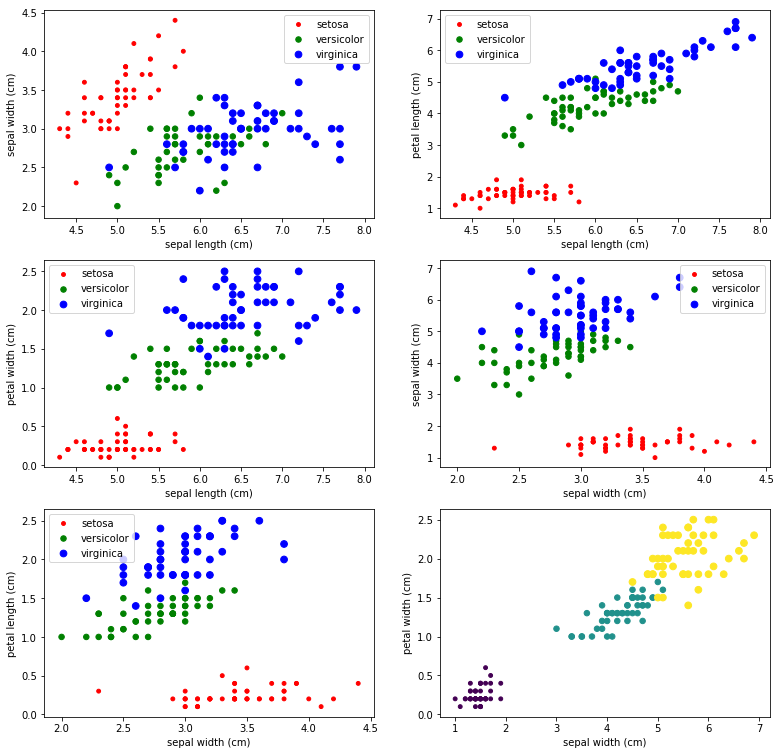

In [59]:
import matplotlib.pyplot as plt
fig=plt.figure(1,figsize=(13,13))
ax1=fig.add_subplot(321,xlabel='sepal length (cm)',ylabel='sepal width (cm)');
ax2=fig.add_subplot(322,xlabel='sepal length (cm)',ylabel='petal length (cm)');
ax3=fig.add_subplot(323,xlabel='sepal length (cm)',ylabel='petal width (cm)');
ax4=fig.add_subplot(324,xlabel='sepal width (cm)',ylabel='sepal width (cm)');
ax5=fig.add_subplot(325,xlabel='sepal width (cm)',ylabel='petal length (cm)');
ax6=fig.add_subplot(326);plt.xlabel('sepal width (cm)');plt.ylabel('petal width (cm)');

ax1.scatter(dataset[labels==0,0],dataset[labels==0,1],15.0*array(labels[labels==0]+1),c='r',label='setosa')
ax1.scatter(dataset[labels==1,0],dataset[labels==1,1],15.0*array(labels[labels==1]+1),c='g',label='versicolor')
ax1.scatter(dataset[labels==2,0],dataset[labels==2,1],15.0*array(labels[labels==2]+1),c='b',label='virginica')
ax1.legend(loc='upper right')
ax2.scatter(dataset[labels==0,0],dataset[labels==0,2],15.0*array(labels[labels==0]+1),c='r',label='setosa')
ax2.scatter(dataset[labels==1,0],dataset[labels==1,2],15.0*array(labels[labels==1]+1),c='g',label='versicolor')
ax2.scatter(dataset[labels==2,0],dataset[labels==2,2],15.0*array(labels[labels==2]+1),c='b',label='virginica')
ax2.legend(loc='upper left')
ax3.scatter(dataset[labels==0,0],dataset[labels==0,3],15.0*array(labels[labels==0]+1),c='r',label='setosa')
ax3.scatter(dataset[labels==1,0],dataset[labels==1,3],15.0*array(labels[labels==1]+1),c='g',label='versicolor')
ax3.scatter(dataset[labels==2,0],dataset[labels==2,3],15.0*array(labels[labels==2]+1),c='b',label='virginica')
ax3.legend(loc='upper left')
ax4.scatter(dataset[labels==0,1],dataset[labels==0,2],15.0*array(labels[labels==0]+1),c='r',label='setosa')
ax4.scatter(dataset[labels==1,1],dataset[labels==1,2],15.0*array(labels[labels==1]+1),c='g',label='versicolor')
ax4.scatter(dataset[labels==2,1],dataset[labels==2,2],15.0*array(labels[labels==2]+1),c='b',label='virginica')
ax4.legend(loc='upper right')
ax5.scatter(dataset[labels==0,1],dataset[labels==0,3],15.0*array(labels[labels==0]+1),c='r',label='setosa')
ax5.scatter(dataset[labels==1,1],dataset[labels==1,3],15.0*array(labels[labels==1]+1),c='g',label='versicolor')
ax5.scatter(dataset[labels==2,1],dataset[labels==2,3],15.0*array(labels[labels==2]+1),c='b',label='virginica')
ax5.legend(loc='upper left')
ax6.scatter(dataset[:,2],dataset[:,3],15.0*array(labels+1),15.0*array(labels+1))
plt.show()

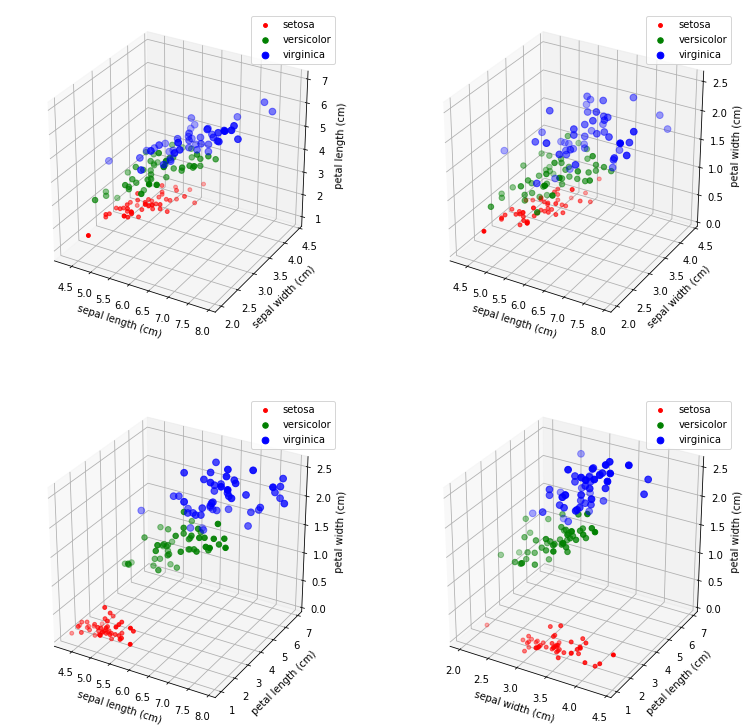

In [94]:
from mpl_toolkits.mplot3d import Axes3D 
fig2=plt.figure(2,figsize=(13,13))
ax1=fig2.add_subplot(221,projection='3d',xlabel='sepal length (cm)',ylabel='sepal width (cm)',zlabel='petal length (cm)')
ax1.scatter(dataset[labels==0,0],dataset[labels==0,1],dataset[labels==0,2],s=15.0*array(labels[labels==0]+1),c='r',label='setosa')
ax1.scatter(dataset[labels==1,0],dataset[labels==1,1],dataset[labels==1,2],s=15.0*array(labels[labels==1]+1),c='g',label='versicolor')
ax1.scatter(dataset[labels==2,0],dataset[labels==2,1],dataset[labels==2,2],s=15.0*array(labels[labels==2]+1),c='b',label='virginica')
ax1.legend(loc='upper right')

ax1=fig2.add_subplot(222,projection='3d',xlabel='sepal length (cm)',ylabel='sepal width (cm)',zlabel='petal width (cm)')
ax1.scatter(dataset[labels==0,0],dataset[labels==0,1],dataset[labels==0,3],s=15.0*array(labels[labels==0]+1),c='r',label='setosa')
ax1.scatter(dataset[labels==1,0],dataset[labels==1,1],dataset[labels==1,3],s=15.0*array(labels[labels==1]+1),c='g',label='versicolor')
ax1.scatter(dataset[labels==2,0],dataset[labels==2,1],dataset[labels==2,3],s=15.0*array(labels[labels==2]+1),c='b',label='virginica')
ax1.legend(loc='upper right')

ax1=fig2.add_subplot(223,projection='3d',xlabel='sepal length (cm)',ylabel='petal length (cm)',zlabel='petal width (cm)')
ax1.scatter(dataset[labels==0,0],dataset[labels==0,2],dataset[labels==0,3],s=15.0*array(labels[labels==0]+1),c='r',label='setosa')
ax1.scatter(dataset[labels==1,0],dataset[labels==1,2],dataset[labels==1,3],s=15.0*array(labels[labels==1]+1),c='g',label='versicolor')
ax1.scatter(dataset[labels==2,0],dataset[labels==2,2],dataset[labels==2,3],s=15.0*array(labels[labels==2]+1),c='b',label='virginica')
ax1.legend(loc='upper right')

ax1=fig2.add_subplot(224,projection='3d',xlabel='sepal width (cm)',ylabel='petal length (cm)',zlabel='petal width (cm)')
ax1.scatter(dataset[labels==0,1],dataset[labels==0,2],dataset[labels==0,3],s=15.0*array(labels[labels==0]+1),c='r',label='setosa')
ax1.scatter(dataset[labels==1,1],dataset[labels==1,2],dataset[labels==1,3],s=15.0*array(labels[labels==1]+1),c='g',label='versicolor')
ax1.scatter(dataset[labels==2,1],dataset[labels==2,2],dataset[labels==2,3],s=15.0*array(labels[labels==2]+1),c='b',label='virginica')
ax1.legend(loc='upper right')
plt.show()                                                           
                                                              

In [80]:
15.0*array(labels[labels==1]+1)

array([ 30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
        30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
        30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
        30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
        30.,  30.,  30.,  30.,  30.,  30.])